In [1]:
import os
os.chdir('../../')

import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

RDKit WARNING: [16:50:46] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
X_drug, X_target, y = load_process_KIBA('./data/', binary=False)

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

Beginning Processing...
Beginning to extract zip file...
Done!
in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
Done.


Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 139.46227
Training at Epoch 1 iteration 100 with loss 0.8524759
Training at Epoch 1 iteration 200 with loss 0.7659789
Training at Epoch 1 iteration 300 with loss 0.77633584
Validation at Epoch 1 , MSE: 0.6252079559108886 , Pearson Correlation: 0.37120514588057757 with p-value: 0.0 , Concordance Index: 0.6476415418668936
Training at Epoch 2 iteration 0 with loss 0.6057545
Training at Epoch 2 iteration 100 with loss 0.7182188
Training at Epoch 2 iteration 200 with loss 0.5523121
Training at Epoch 2 iteration 300 with loss 0.7289833
Validation at Epoch 2 , MSE: 0.5057249716094536 , Pearson Correlation: 0.5271302441704545 with p-value: 0.0 , Concordance Index: 0.7108944244194332
Training at Epoch 3 iteration 0 with loss 0.3336088
Training at Epoch 3 iteration 100 with loss 0.55122924
Training at Epoch 3 iteration 200 with loss 0.9139983
Training at Epoch 3 iteration 300 with loss 0

Training at Epoch 23 iteration 100 with loss 0.21723273
Training at Epoch 23 iteration 200 with loss 0.3215351
Training at Epoch 23 iteration 300 with loss 0.37353116
Validation at Epoch 23 , MSE: 0.2904944052104942 , Pearson Correlation: 0.7605299689697724 with p-value: 0.0 , Concordance Index: 0.7966217114894854
Training at Epoch 24 iteration 0 with loss 0.2798943
Training at Epoch 24 iteration 100 with loss 0.39643136
Training at Epoch 24 iteration 200 with loss 0.4295775
Training at Epoch 24 iteration 300 with loss 0.24249879
Validation at Epoch 24 , MSE: 0.3018565196551627 , Pearson Correlation: 0.7695774972212105 with p-value: 0.0 , Concordance Index: 0.7993369790819714
Training at Epoch 25 iteration 0 with loss 0.22099498
Training at Epoch 25 iteration 100 with loss 0.26581356
Training at Epoch 25 iteration 200 with loss 0.31408113
Training at Epoch 25 iteration 300 with loss 0.31087956
Validation at Epoch 25 , MSE: 0.28863161072602156 , Pearson Correlation: 0.762775379909726 wi

Training at Epoch 45 iteration 200 with loss 0.20137015
Training at Epoch 45 iteration 300 with loss 0.20637983
Validation at Epoch 45 , MSE: 0.2931538610613398 , Pearson Correlation: 0.8161000618379057 with p-value: 0.0 , Concordance Index: 0.8220322200148337
Training at Epoch 46 iteration 0 with loss 0.19920787
Training at Epoch 46 iteration 100 with loss 0.17406026
Training at Epoch 46 iteration 200 with loss 0.19329071
Training at Epoch 46 iteration 300 with loss 0.19324802
Validation at Epoch 46 , MSE: 0.27236348972361674 , Pearson Correlation: 0.8138519945205422 with p-value: 0.0 , Concordance Index: 0.8187842761565732
Training at Epoch 47 iteration 0 with loss 0.23279054
Training at Epoch 47 iteration 100 with loss 0.17864995
Training at Epoch 47 iteration 200 with loss 0.21056506
Training at Epoch 47 iteration 300 with loss 0.1824354
Validation at Epoch 47 , MSE: 0.27391643581608033 , Pearson Correlation: 0.8068993596091968 with p-value: 0.0 , Concordance Index: 0.8129289169844

Training at Epoch 67 iteration 300 with loss 0.14193657
Validation at Epoch 67 , MSE: 0.20856750871228383 , Pearson Correlation: 0.8429001782451714 with p-value: 0.0 , Concordance Index: 0.8417360115920044
Training at Epoch 68 iteration 0 with loss 0.107186705
Training at Epoch 68 iteration 100 with loss 0.12097235
Training at Epoch 68 iteration 200 with loss 0.11111714
Training at Epoch 68 iteration 300 with loss 0.13749462
Validation at Epoch 68 , MSE: 0.2023187404043579 , Pearson Correlation: 0.8437123674403135 with p-value: 0.0 , Concordance Index: 0.8441180641614258
Training at Epoch 69 iteration 0 with loss 0.13140449
Training at Epoch 69 iteration 100 with loss 0.14743677
Training at Epoch 69 iteration 200 with loss 0.12306302
Training at Epoch 69 iteration 300 with loss 0.16115318
Validation at Epoch 69 , MSE: 0.20788437705473423 , Pearson Correlation: 0.8422315875620378 with p-value: 0.0 , Concordance Index: 0.8416793794950875
Training at Epoch 70 iteration 0 with loss 0.12666

Validation at Epoch 89 , MSE: 0.18879584363341734 , Pearson Correlation: 0.8552581698425819 with p-value: 0.0 , Concordance Index: 0.8493616044313579
Training at Epoch 90 iteration 0 with loss 0.10148429
Training at Epoch 90 iteration 100 with loss 0.07839349
Training at Epoch 90 iteration 200 with loss 0.07834745
Training at Epoch 90 iteration 300 with loss 0.0998727
Validation at Epoch 90 , MSE: 0.19582125600456016 , Pearson Correlation: 0.8511291809184155 with p-value: 0.0 , Concordance Index: 0.8505655474059094
Training at Epoch 91 iteration 0 with loss 0.081786595
Training at Epoch 91 iteration 100 with loss 0.09030631
Training at Epoch 91 iteration 200 with loss 0.10174892
Training at Epoch 91 iteration 300 with loss 0.11394987
Validation at Epoch 91 , MSE: 0.20908388322739013 , Pearson Correlation: 0.8478519940615383 with p-value: 0.0 , Concordance Index: 0.8477589281991904
Training at Epoch 92 iteration 0 with loss 0.07235121
Training at Epoch 92 iteration 100 with loss 0.08341

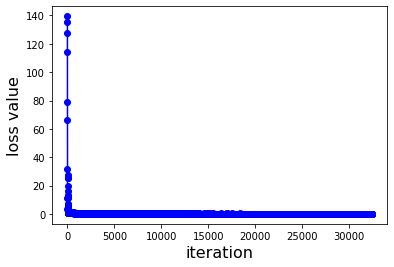

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 138.70436
Training at Epoch 1 iteration 100 with loss 0.77190566
Training at Epoch 1 iteration 200 with loss 0.835519
Training at Epoch 1 iteration 300 with loss 0.8509926
Validation at Epoch 1 , MSE: 0.6235369147324705 , Pearson Correlation: 0.3586581634380183 with p-value: 0.0 , Concordance Index: 0.6424431400227089
Training at Epoch 2 iteration 0 with loss 0.38018072
Training at Epoch 2 iteration 100 with loss 0.6370832
Training at Epoch 2 iteration 200 with loss 0.6170039
Training at Epoch 2 iteration 300 with loss 0.511665
Validation at Epoch 2 , MSE: 0.532612506927327 , Pearson Correlation: 0.4929160110746351 with p-value: 0.0 , Concordance Index: 0.6989713458759194
Training

Validation at Epoch 22 , MSE: 0.3393880142118578 , Pearson Correlation: 0.7269140717230155 with p-value: 0.0 , Concordance Index: 0.7860269651925148
Training at Epoch 23 iteration 0 with loss 0.30672795
Training at Epoch 23 iteration 100 with loss 0.33132145
Training at Epoch 23 iteration 200 with loss 0.31989515
Training at Epoch 23 iteration 300 with loss 0.31595206
Validation at Epoch 23 , MSE: 0.32213744833859587 , Pearson Correlation: 0.7359154472478122 with p-value: 0.0 , Concordance Index: 0.7957903182117151
Training at Epoch 24 iteration 0 with loss 0.14728713
Training at Epoch 24 iteration 100 with loss 0.39326212
Training at Epoch 24 iteration 200 with loss 0.3834597
Training at Epoch 24 iteration 300 with loss 0.321271
Validation at Epoch 24 , MSE: 0.3782266757545426 , Pearson Correlation: 0.7459550423934508 with p-value: 0.0 , Concordance Index: 0.7975727716298355
Training at Epoch 25 iteration 0 with loss 0.27293366
Training at Epoch 25 iteration 100 with loss 0.35112056
T

Training at Epoch 45 iteration 0 with loss 0.28850788
Training at Epoch 45 iteration 100 with loss 0.18743822
Training at Epoch 45 iteration 200 with loss 0.22433424
Training at Epoch 45 iteration 300 with loss 0.2102351
Validation at Epoch 45 , MSE: 0.2598641662874676 , Pearson Correlation: 0.7971477507404899 with p-value: 0.0 , Concordance Index: 0.8216566195048497
Training at Epoch 46 iteration 0 with loss 0.18351835
Training at Epoch 46 iteration 100 with loss 0.19739759
Training at Epoch 46 iteration 200 with loss 0.13399619
Training at Epoch 46 iteration 300 with loss 0.24391958
Validation at Epoch 46 , MSE: 0.2756735428158841 , Pearson Correlation: 0.7985692534932324 with p-value: 0.0 , Concordance Index: 0.8202253213112295
Training at Epoch 47 iteration 0 with loss 0.19435152
Training at Epoch 47 iteration 100 with loss 0.2399174
Training at Epoch 47 iteration 200 with loss 0.25317234
Training at Epoch 47 iteration 300 with loss 0.18715021
Validation at Epoch 47 , MSE: 0.255563

Training at Epoch 67 iteration 100 with loss 0.1626054
Training at Epoch 67 iteration 200 with loss 0.16200867
Training at Epoch 67 iteration 300 with loss 0.24314997
Validation at Epoch 67 , MSE: 0.24220169798572483 , Pearson Correlation: 0.8305103502770691 with p-value: 0.0 , Concordance Index: 0.8396372756358862
Training at Epoch 68 iteration 0 with loss 0.15531948
Training at Epoch 68 iteration 100 with loss 0.1276138
Training at Epoch 68 iteration 200 with loss 0.18702063
Training at Epoch 68 iteration 300 with loss 0.18783078
Validation at Epoch 68 , MSE: 0.22021888784776358 , Pearson Correlation: 0.8307062189322747 with p-value: 0.0 , Concordance Index: 0.8367472831943524
Training at Epoch 69 iteration 0 with loss 0.15110177
Training at Epoch 69 iteration 100 with loss 0.12532488
Training at Epoch 69 iteration 200 with loss 0.11818357
Training at Epoch 69 iteration 300 with loss 0.14188606
Validation at Epoch 69 , MSE: 0.24422628837861174 , Pearson Correlation: 0.828516782504356

Training at Epoch 89 iteration 200 with loss 0.1382595
Training at Epoch 89 iteration 300 with loss 0.100334466
Validation at Epoch 89 , MSE: 0.24982680308515653 , Pearson Correlation: 0.8415444254790468 with p-value: 0.0 , Concordance Index: 0.8466087051601834
Training at Epoch 90 iteration 0 with loss 0.12935536
Training at Epoch 90 iteration 100 with loss 0.13117811
Training at Epoch 90 iteration 200 with loss 0.13633926
Training at Epoch 90 iteration 300 with loss 0.107614815
Validation at Epoch 90 , MSE: 0.20709666657666043 , Pearson Correlation: 0.839438031666216 with p-value: 0.0 , Concordance Index: 0.8458997518678608
Training at Epoch 91 iteration 0 with loss 0.08989336
Training at Epoch 91 iteration 100 with loss 0.092610314
Training at Epoch 91 iteration 200 with loss 0.1195761
Training at Epoch 91 iteration 300 with loss 0.117124304
Validation at Epoch 91 , MSE: 0.2178151032350029 , Pearson Correlation: 0.8413573626807883 with p-value: 0.0 , Concordance Index: 0.84583914916

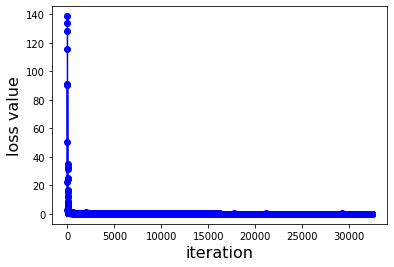

In [4]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

model = models.model_initialize(**config)
model.train(train, val, test)

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

model = models.model_initialize(**config)
model.train(train, val, test)

in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 139.46524
Training at Epoch 1 iteration 100 with loss 0.8609999
Training at Epoch 1 iteration 200 with loss 0.7148015
Training at Epoch 1 iteration 300 with loss 0.73661745
Validation at Epoch 1 , MSE: 0.6367081121993841 , Pearson Correlation: 0.4090436750484895 with p-value: 0.0 , Concordance Index: 0.6715894473455478
Training at Epoch 2 iteration 0 with loss 0.6340263
Training at Epoch 2 iteration 100 with loss 0.66415685
Training at Epoch 2 iteration 200 with loss 0.5679356
Training at Epoch 2 iteration 300 with loss 0.6172343
Validation at Epoch 2 , MSE: 0.5460745795356179 , Pearson Correlation: 0.5336723108294461 with p-value: 0.0 , Concordance Index: 0.7246377944283311
Train

Validation at Epoch 22 , MSE: 0.32315906195633937 , Pearson Correlation: 0.7511600503342932 with p-value: 0.0 , Concordance Index: 0.7980720289705443
Training at Epoch 23 iteration 0 with loss 0.23712516
Training at Epoch 23 iteration 100 with loss 0.22566727
Training at Epoch 23 iteration 200 with loss 0.3584891
Training at Epoch 23 iteration 300 with loss 0.2844079
Validation at Epoch 23 , MSE: 0.32189146012316056 , Pearson Correlation: 0.7541484091414316 with p-value: 0.0 , Concordance Index: 0.8037732908641279
Training at Epoch 24 iteration 0 with loss 0.3232067
Training at Epoch 24 iteration 100 with loss 0.31845796
Training at Epoch 24 iteration 200 with loss 0.3031874
Training at Epoch 24 iteration 300 with loss 0.211002
Validation at Epoch 24 , MSE: 0.3232353221314734 , Pearson Correlation: 0.7543632750807707 with p-value: 0.0 , Concordance Index: 0.8043292696130214
Training at Epoch 25 iteration 0 with loss 0.17400283
Training at Epoch 25 iteration 100 with loss 0.33140767
Tra

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

model = models.model_initialize(**config)
model.train(train, val, test)

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

model = models.model_initialize(**config)
model.train(train, val, test)